<a href="https://colab.research.google.com/github/duthua2013/homework/blob/main/Homework_Yolov8_recognize_qualitybottle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import os
import cv2
import numpy as np

In [34]:
CLASS_MAP = {
    0: 'bottle',
    1: 'cap',
    2: 'water_level',
    3: 'label'
}

In [35]:
def normalize_bbox(x, y, w, h, img_w, img_h):
    return [
        round((x + w / 2) / img_w, 6),
        round((y + h / 2) / img_h, 6),
        round(w / img_w, 6),
        round(h / img_h, 6)
    ]

def annotate_image(image_path, label_output_path):
    img = cv2.imread(image_path)
    h, w, _ = img.shape

    bottle_box = [0, 0, w, h]
    norm_bottle = normalize_bbox(*bottle_box, w, h)

    cap_h = int(0.12 * h)
    cap_box = [int(0.4 * w), int(0.0 * h), int(0.2 * w), cap_h]
    norm_cap = normalize_bbox(*cap_box, w, h)

    wl_box = [int(0.3 * w), int(0.28 * h), int(0.4 * w), int(0.02 * h)]
    norm_water = normalize_bbox(*wl_box, w, h)

    label_box = [int(0.25 * w), int(0.38 * h), int(0.5 * w), int(0.3 * h)]
    norm_label = normalize_bbox(*label_box, w, h)

    with open(label_output_path, 'w') as f:
        f.write(f"0 {' '.join(map(str, norm_bottle))}\n")
        f.write(f"1 {' '.join(map(str, norm_cap))}\n")
        f.write(f"2 {' '.join(map(str, norm_water))}\n")
        f.write(f"3 {' '.join(map(str, norm_label))}\n")

    print(f"✅ Annotated: {image_path} -> {label_output_path}")

def annotate_folder(image_dir, label_dir):
    os.makedirs(label_dir, exist_ok=True)
    for file in os.listdir(image_dir):
        if file.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(image_dir, file)
            label_path = os.path.join(label_dir, file.rsplit('.', 1)[0] + '.txt')
            annotate_image(img_path, label_path)

In [9]:
if __name__ == '__main__':
    image_folder = '/content/drive/MyDrive/datasetbottle/ng'       # Thu muc chua anh
    label_folder = '/content/drive/MyDrive/datasetbottle/ng/train'       # Thu muc se tao file nhan

    annotate_folder(image_folder, label_folder)

    print("\n🎯 Da gan nhan hoan tat. Ban co the su dung dataset de train YOLO.")

✅ Annotated: /content/drive/MyDrive/datasetbottle/ng/202205-027-p1-640x427 - Copy (3).jpg -> /content/drive/MyDrive/datasetbottle/ng/train/202205-027-p1-640x427 - Copy (3).txt
✅ Annotated: /content/drive/MyDrive/datasetbottle/ng/202205-027-p1-640x427 - Copy (3) - Copy.jpg -> /content/drive/MyDrive/datasetbottle/ng/train/202205-027-p1-640x427 - Copy (3) - Copy.txt
✅ Annotated: /content/drive/MyDrive/datasetbottle/ng/202205-027-p1-640x427 - Copy (2) - Copy.jpg -> /content/drive/MyDrive/datasetbottle/ng/train/202205-027-p1-640x427 - Copy (2) - Copy.txt
✅ Annotated: /content/drive/MyDrive/datasetbottle/ng/202205-027-p1-640x427 - Copy (2).jpg -> /content/drive/MyDrive/datasetbottle/ng/train/202205-027-p1-640x427 - Copy (2).txt
✅ Annotated: /content/drive/MyDrive/datasetbottle/ng/Open-a-Bottle-of-Water-Step-20-Version-3.jpg -> /content/drive/MyDrive/datasetbottle/ng/train/Open-a-Bottle-of-Water-Step-20-Version-3.txt
✅ Annotated: /content/drive/MyDrive/datasetbottle/ng/images (6) - Copy.jpg -

In [11]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17413, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 17413 (delta 64), reused 22 (delta 22), pack-reused 17327 (from 4)
Receiving objects: 100% (17413/17413), 16.31 MiB | 29.72 MiB/s, done.
Resolving deltas: 100% (11932/11932), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s e

In [8]:
%cd /content/drive/MyDrive/datasetbottle

/content/drive/MyDrive/datasetbottle


In [9]:
!python prepare_yolo_data.py

Tổng số ảnh tìm thấy trực tiếp trong OK/NG: 61
Số cặp ảnh/nhãn hợp lệ tìm thấy: 61

Số lượng mẫu huấn luyện (train): 48
Số lượng mẫu kiểm định (val): 13

Đang sao chép tập huấn luyện...
Đã sao chép thành công 48 cặp file vào /content/drive/MyDrive/datasetbottle/yolo_dataset/images.

Đang sao chép tập kiểm định...
Đã sao chép thành công 13 cặp file vào /content/drive/MyDrive/datasetbottle/yolo_dataset/images.

Đã tạo xong cấu trúc dữ liệu cho YOLO tại: /content/drive/MyDrive/datasetbottle/yolo_dataset
Cấu trúc mới:
/content/drive/MyDrive/datasetbottle/yolo_dataset/
├── images/
│   ├── train/ (chứa file .jpg)
│   └── val/   (chứa file .jpg)
└── labels/
    ├── train/ (chứa file .txt)
    └── val/   (chứa file .txt)


In [10]:
%%writefile bottle_project.yaml
path: ./yolo_dataset

train: images/train
val: images/val

nc: 4
names: ['bottle', 'cap', 'water_level', 'label']

Writing bottle_project.yaml


In [11]:
!pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.2/112.6 GB disk)


In [18]:
!yolo train model=yolov8n.pt data=bottle_project.yaml epochs=50 imgsz=640 batch=16 name=bottle_yolov8n_run1

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=bottle_project.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=bottle_yolov8n_run13, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pr

In [20]:
!yolo predict model=runs/detect/bottle_yolov8n_run13/weights/best.pt source='/content/test.jpg' save=True

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/test.jpg: 480x640 1 bottle, 2 caps, 1 label, 35.1ms
Speed: 4.5ms preprocess, 35.1ms inference, 162.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict



=== Bắt đầu kiểm tra 2 ảnh ===

--- Xử lý ảnh 1/2: images - Copy.jpg ---

--- Xử lý ảnh 2/2: 202205-027-p1-640x427 - Copy (2).jpg ---


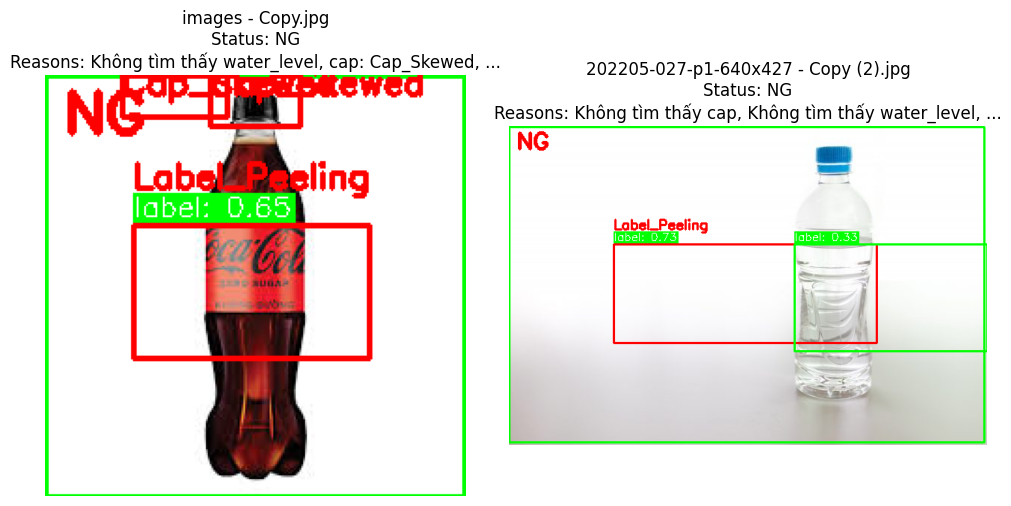


=== Hoàn thành kiểm tra ===


In [30]:
import cv2
import numpy as np
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt
import random
import math


try:
    if 'yolo_model' not in locals() or yolo_model is None:
        yolo_model = YOLO('runs/detect/bottle_yolov8n_run13/weights/best.pt')
        CLASS_NAMES_YOLO = yolo_model.names
        print(f"Đã tải model YOLO. Các lớp: {CLASS_NAMES_YOLO}")
        def get_class_index(name):
            try:
                return list(CLASS_NAMES_YOLO.values()).index(name)
            except ValueError:
                print(f"Cảnh báo: Không tìm thấy lớp '{name}' trong model YOLO.")
                return -1
        CAP_CLASS_INDEX = get_class_index('cap')
        WL_CLASS_INDEX = get_class_index('water_level')
        LABEL_CLASS_INDEX = get_class_index('label')
        CAP_OK_LABEL = 'Cap_OK'
        WL_OK_LABEL = 'WL_OK'
        LABEL_OK_LABEL = 'Label_OK'
        def classify_cap_roi(roi_image): return random.choice([CAP_OK_LABEL, 'Cap_Skewed', 'Cap_Loose'])
        def classify_wl_roi(roi_image): return random.choice([WL_OK_LABEL, 'WL_Low', 'WL_High'])
        def classify_label_roi(roi_image): return random.choice([LABEL_OK_LABEL, 'Label_Torn', 'Label_Peeling'])

except NameError:
     print("Lỗi: Biến yolo_model chưa được định nghĩa. Vui lòng chạy lại ô code load model.")
     yolo_model = None
except Exception as e:
    print(f"Lỗi khi tải/kiểm tra model YOLO: {e}")
    yolo_model = None



def check_and_annotate_bottle(image_path):
    """
    Kiểm tra, vẽ bounding box, ghi chú lỗi và trả về ảnh đã chú thích.
    (Nội dung hàm này giữ nguyên như phiên bản trước)
    """
    if yolo_model is None: return None, "Lỗi Model", []
    img_bgr = cv2.imread(image_path)
    if img_bgr is None: return None, "Lỗi đọc ảnh", []
    annotated_img = img_bgr.copy()
    img_height, img_width = annotated_img.shape[:2]
    results = yolo_model.predict(source=img_bgr, verbose=False, conf=0.3)
    result = results[0]
    boxes = result.boxes
    component_status = { 'cap': 'Chưa phát hiện', 'water_level': 'Chưa phát hiện', 'label': 'Chưa phát hiện' }
    annotations_to_draw = []
    is_ng = False
    reasons = []
    for box in boxes:
        class_id = int(box.cls[0]); conf = float(box.conf[0]); coords = box.xyxy[0].cpu().numpy().astype(int); x1, y1, x2, y2 = coords
        color = (0, 255, 0); cv2.rectangle(annotated_img, (x1, y1), (x2, y2), color, 2)
        label_text = f"{CLASS_NAMES_YOLO.get(class_id, 'Unknown')}: {conf:.2f}"; (w, h), _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2); cv2.rectangle(annotated_img, (x1, y1 - h - 5), (x1 + w, y1), color, -1); cv2.putText(annotated_img, label_text, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)
        roi = img_bgr[y1:y2, x1:x2];
        if roi.size == 0: continue
        status = "Chưa phân loại"; component_name = "Unknown"; is_component_ok = True
        if class_id == CAP_CLASS_INDEX: component_name = 'cap'; status = classify_cap_roi(roi); is_component_ok = (status == CAP_OK_LABEL)
        elif class_id == WL_CLASS_INDEX: component_name = 'water_level'; status = classify_wl_roi(roi); is_component_ok = (status == WL_OK_LABEL)
        elif class_id == LABEL_CLASS_INDEX: component_name = 'label'; status = classify_label_roi(roi); is_component_ok = (status == LABEL_OK_LABEL)
        if component_name != "Unknown":
             if component_status[component_name] == 'Chưa phát hiện' or not is_component_ok: component_status[component_name] = status
             if not is_component_ok:
                 is_ng = True; reason_text = status; reasons.append(f"{component_name}: {reason_text}")
                 annotations_to_draw.append((reason_text, x1, y1 - 20))
                 cv2.rectangle(annotated_img, (x1, y1), (x2, y2), (0, 0, 255), 2) # Red box for error
    for name, status in component_status.items():
        if status == 'Chưa phát hiện': is_ng = True; reasons.append(f"Không tìm thấy {name}")
    for text, x, y in annotations_to_draw: cv2.putText(annotated_img, text, (x, max(y, 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    final_status = "NG" if is_ng else "OK"; final_color = (0, 0, 255) if is_ng else (0, 255, 0)
    cv2.putText(annotated_img, final_status, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, final_color, 3)
    unique_reasons = sorted(list(set(reasons)))
    return annotated_img, final_status, unique_reasons

image_paths_to_check = [
    '/content/images - Copy.jpg',
    '/content/202205-027-p1-640x427 - Copy (2).jpg',
]

num_images = len(image_paths_to_check)
ncols = 3 if num_images > 2 else num_images
nrows = math.ceil(num_images / ncols)

plt.figure(figsize=(5 * ncols, 5 * nrows))

print(f"\n=== Bắt đầu kiểm tra {num_images} ảnh ===")

for i, img_path in enumerate(image_paths_to_check):
    print(f"\n--- Xử lý ảnh {i+1}/{num_images}: {Path(img_path).name} ---")
    annotated_image_bgr, status, reason_list = check_and_annotate_bottle(img_path)

    plt.subplot(nrows, ncols, i + 1)

    if annotated_image_bgr is not None:
        annotated_image_rgb = cv2.cvtColor(annotated_image_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(annotated_image_rgb)
        title = f"{Path(img_path).name}\nStatus: {status}"
        if status == "NG":
            display_reasons = reason_list[:2]
            if len(reason_list) > 2:
                 display_reasons.append("...")
            title += f"\nReasons: {', '.join(display_reasons)}"
        plt.title(title)
    else:
        plt.text(0.5, 0.5, f'Lỗi xử lý ảnh:\n{status}', horizontalalignment='center', verticalalignment='center')
        plt.title(f"{Path(img_path).name}\nLỗi")

    plt.axis('off')

plt.tight_layout()
plt.show()

print("\n=== Hoàn thành kiểm tra ===")


=== Bắt đầu kiểm tra 2 ảnh ===

--- Xử lý ảnh 1/2: 202205-027-p1-640x427 - Copy (2).jpg ---

--- Xử lý ảnh 2/2: TXKD-RGB-350x540-1 - Copy.png ---


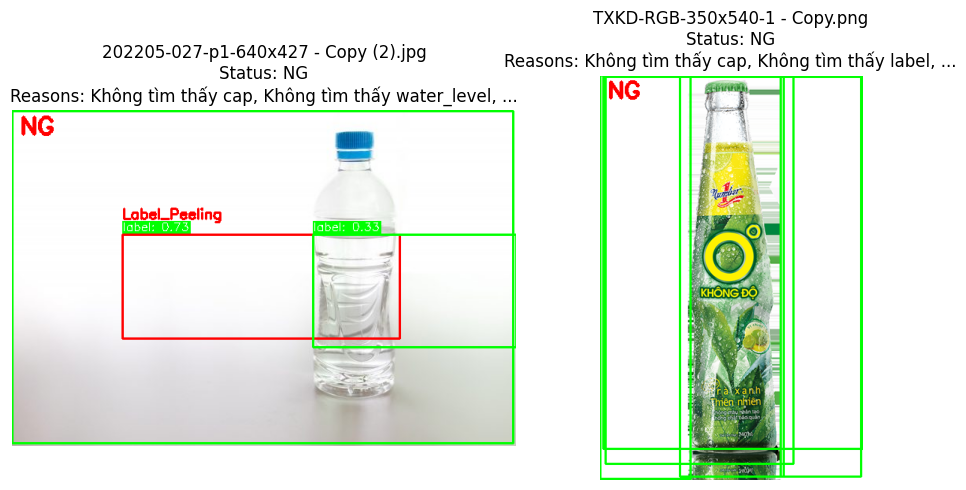


=== Hoàn thành kiểm tra ===


In [31]:
image_paths_to_check = [
    '/content/202205-027-p1-640x427 - Copy (2).jpg',
    '/content/TXKD-RGB-350x540-1 - Copy.png',
]

num_images = len(image_paths_to_check)
ncols = 3 if num_images > 2 else num_images
nrows = math.ceil(num_images / ncols)

plt.figure(figsize=(5 * ncols, 5 * nrows))

print(f"\n=== Bắt đầu kiểm tra {num_images} ảnh ===")

for i, img_path in enumerate(image_paths_to_check):
    print(f"\n--- Xử lý ảnh {i+1}/{num_images}: {Path(img_path).name} ---")
    annotated_image_bgr, status, reason_list = check_and_annotate_bottle(img_path)

    plt.subplot(nrows, ncols, i + 1)

    if annotated_image_bgr is not None:
        annotated_image_rgb = cv2.cvtColor(annotated_image_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(annotated_image_rgb)
        title = f"{Path(img_path).name}\nStatus: {status}"
        if status == "NG":
            display_reasons = reason_list[:2]
            if len(reason_list) > 2:
                 display_reasons.append("...")
            title += f"\nReasons: {', '.join(display_reasons)}"
        plt.title(title)
    else:
        plt.text(0.5, 0.5, f'Lỗi xử lý ảnh:\n{status}', horizontalalignment='center', verticalalignment='center')
        plt.title(f"{Path(img_path).name}\nLỗi")

    plt.axis('off')

plt.tight_layout()
plt.show()

print("\n=== Hoàn thành kiểm tra ===")


=== Bắt đầu kiểm tra 2 ảnh ===

--- Xử lý ảnh 1/2: images (4) - Copy.jpg ---

--- Xử lý ảnh 2/2: images - Copy.jpg ---


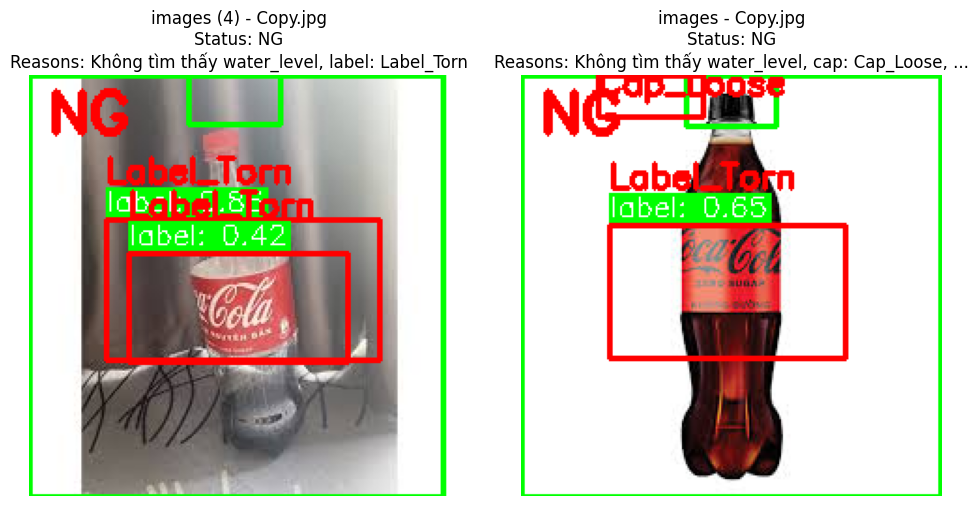


=== Hoàn thành kiểm tra ===


In [32]:
image_paths_to_check = [
    '/content/images (4) - Copy.jpg',
    '/content/images - Copy.jpg',
]

num_images = len(image_paths_to_check)
ncols = 3 if num_images > 2 else num_images
nrows = math.ceil(num_images / ncols)

plt.figure(figsize=(5 * ncols, 5 * nrows))

print(f"\n=== Bắt đầu kiểm tra {num_images} ảnh ===")

for i, img_path in enumerate(image_paths_to_check):
    print(f"\n--- Xử lý ảnh {i+1}/{num_images}: {Path(img_path).name} ---")
    annotated_image_bgr, status, reason_list = check_and_annotate_bottle(img_path)

    plt.subplot(nrows, ncols, i + 1)

    if annotated_image_bgr is not None:
        annotated_image_rgb = cv2.cvtColor(annotated_image_bgr, cv2.COLOR_BGR2RGB)
        plt.imshow(annotated_image_rgb)
        title = f"{Path(img_path).name}\nStatus: {status}"
        if status == "NG":
            display_reasons = reason_list[:2]
            if len(reason_list) > 2:
                 display_reasons.append("...")
            title += f"\nReasons: {', '.join(display_reasons)}"
        plt.title(title)
    else:
        plt.text(0.5, 0.5, f'Lỗi xử lý ảnh:\n{status}', horizontalalignment='center', verticalalignment='center')
        plt.title(f"{Path(img_path).name}\nLỗi")

    plt.axis('off')

plt.tight_layout()
plt.show()

print("\n=== Hoàn thành kiểm tra ===")